<a href="https://colab.research.google.com/github/srikacharla/CSC8980/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Id: 002556509
Name: Sri Harsha Kacharla

Question 1) (20 points) Write a generic function that takes: Classification algorithm name,
vectorization method name, training set with labels as parameters (total of 3 parameters should
be passed). The function should take the classification algorithm name, the vectorization
method’s name, and the training set and train the desired model. Use the default training
parameters for the models we have seen in class. This function should return the trained model.

In [1]:
from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


def trainWithModel(classificationAlgo,vectorizationMethod,trainingSet):
    classifier = ""
    vectorizer = ""
    if classificationAlgo == 'Naive Bayes':
        classifier = MultinomialNB()
    elif classificationAlgo == 'RandomForest':
        classifier = RandomForestClassifier()
    elif classificationAlgo == 'Support Vector Machines':
        classifier = svm.SVC()
    else:
        return "Invalid Classification Algorithm"

    if vectorizationMethod == 'TFIDF':
        vectorizer = TfidfVectorizer()
    elif vectorizationMethod == 'Bag of Words':
        vectorizer = CountVectorizer()
    else:
        return "Invalid Vectorizer"

    model = make_pipeline(vectorizer, classifier)
    model.fit(trainingSet.data, trainingSet.target)
    return model



Question 2) (30 points) Using the function from question 1 to build the following models :
a) Model a: Naive Bayes, Vectorizer: TFIDF and Bag of Words, Training set should be 75%
of the provided dataset. Leaving the remaining 25% for testing.
b) Model b: RandomForest, Vectorizer: TFIDF and Bag of Words, Training set should be
70% of the provided dataset. Leaving the remaining 30% for testing.
c) Model c: Support Vector Machines (SVC in sklearn), Vectorizer: TFIDF and Bag of
Words, Training set should be 60% of the provided dataset. Leaving the remaining 40%
for testing.

NOTE: Set the random seed to: 12345 . This needs to be consistently set to train the model
AND split the data in test and train. If this is not done correctly, you will lose points as your
answers will not be comparable with the grading key.

In [2]:
import os
import numpy as np

txt_files = os.listdir('exam1_dataset/TRAINING/negative')
data = []
target = []
for file in txt_files:
   data.append(open(os.path.join('exam1_dataset/TRAINING/negative',file), 'r',encoding="utf8").read())
   target.append(0)
txt_files = os.listdir('exam1_dataset/TRAINING/positive')
for file in txt_files:
   data.append(open(os.path.join('exam1_dataset/TRAINING/positive',file), 'r',encoding="utf8").read())
   target.append(1)
data = np.array(data)
target = np.array(target)

In [11]:




class trainingDataForModelA:
  data = []
  target = []
class trainingDataForModelB:
  data = []
  target = []
class trainingDataForModelC:
  data = []
  target = []
class testingDataForModelA:
  data = []
  target = []
class testingDataForModelB:
  data = []
  target = []
class testingDataForModelC:
  data = []
  target = []



np.random.seed(12345)
indices = np.random.permutation(data.shape[0])
training_idxA, test_idxA = indices[:int(len(data)*0.75)], indices[int(len(data)*0.75):]
training_idxB, test_idxB = indices[:int(len(data)*0.70)], indices[int(len(data)*0.70):]
training_idxC, test_idxC = indices[:int(len(data)*0.60)], indices[int(len(data)*0.60):]

for i in training_idxA:
    trainingDataForModelA.data.append(data[i])
    trainingDataForModelA.target.append(target[i])
for i in test_idxA:
    testingDataForModelA.data.append(data[i])
    testingDataForModelA.target.append(target[i])
for i in training_idxB:
    trainingDataForModelB.data.append(data[i])
    trainingDataForModelB.target.append(target[i])
for i in test_idxB:
    testingDataForModelB.data.append(data[i])
    testingDataForModelB.target.append(target[i])
for i in training_idxC:
    trainingDataForModelC.data.append(data[i])
    trainingDataForModelC.target.append(target[i])
for i in test_idxC:
    testingDataForModelC.data.append(data[i])
    testingDataForModelC.target.append(target[i])

modelA1 = trainWithModel('Naive Bayes','TFIDF',trainingDataForModelA)
modelB1 = trainWithModel('RandomForest','TFIDF',trainingDataForModelB)
modelC1 = trainWithModel('Naive Bayes','TFIDF',trainingDataForModelC)

modelA2 = trainWithModel('Naive Bayes','Bag of Words',testingDataForModelA)
modelB2 = trainWithModel('RandomForest','Bag of Words',trainingDataForModelB)
modelC2 = trainWithModel('Support Vector Machines','Bag of Words',trainingDataForModelC)




Question 3) (30 points) Using the models from Question 2, evaluate each model with its
respective training set (for model a , that set is 25% of the data, for model b , that set is 30% of
the data, and for model c that set is 40% of the data. Be careful to not mix up the evaluation
sets. With the predictions on the test set and show the following metrics: Accuracy, Precision,
Recall, and Macro F1-score. With this in mind, please write and answer these questions in your
notebook:
a) What model performs the best and why? (which metrics do you base this on, and why do
you think it performs better than others).
b) Why is it important not to mix up the testing sets between different models? Think about
this one.
c) Display in a single sorted dataframe (model name, training %, test %, accuracy,
precision, recall, F1-score) all performance metrics, sorted by accuracy in descending
manner.

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

Accuracy = []
Precision = []
Recall = []
F1Score = []
sns.set()
labelsA1 = modelA1.predict(testingDataForModelA.data)
print("A1")
Accuracy.append(sklearn.metrics.accuracy_score(testingDataForModelA.target,labelsA1))
Precision.append(sklearn.metrics.precision_score(testingDataForModelA.target,labelsA1))
Recall.append(sklearn.metrics.recall_score(testingDataForModelA.target,labelsA1))
F1Score.append( sklearn.metrics.f1_score(labelsA1, testingDataForModelA.target, average='macro'))
print('Accuracy:',Accuracy[0])
print('Precision:', Precision[0])
print('Recall:', Recall[0])
print('F1 Score:',F1Score[0])

labelsA2 = modelA2.predict(testingDataForModelA.data)
print("A2")
Accuracy.append(sklearn.metrics.accuracy_score(testingDataForModelA.target,labelsA2))
Precision.append(sklearn.metrics.precision_score(testingDataForModelA.target,labelsA2))
Recall.append(sklearn.metrics.recall_score(testingDataForModelA.target,labelsA2))
F1Score.append( sklearn.metrics.f1_score(labelsA2, testingDataForModelA.target, average='macro'))
print('Accuracy:',Accuracy[1])
print('Precision:',Precision[1] )
print('Recall:',Recall[1] )
print('F1 Score:',F1Score[1] )

labelsB1 = modelB1.predict(testingDataForModelB.data)
print("B1")
Accuracy.append(sklearn.metrics.accuracy_score(testingDataForModelB.target,labelsB1))
Precision.append(sklearn.metrics.precision_score(testingDataForModelB.target,labelsB1))
Recall.append(sklearn.metrics.recall_score(testingDataForModelB.target,labelsB1))
F1Score.append( sklearn.metrics.f1_score(labelsB1, testingDataForModelB.target, average='macro'))
print('Accuracy:', Accuracy[2])
print('Precision:', Precision[2])
print('Recall:',Recall[2] )
print('F1 Score:', F1Score[2])

labelsB2 = modelB2.predict(testingDataForModelB.data)
print("B2")
Accuracy.append(sklearn.metrics.accuracy_score(testingDataForModelB.target,labelsB2))
Precision.append(sklearn.metrics.precision_score(testingDataForModelB.target,labelsB2))
Recall.append(sklearn.metrics.recall_score(testingDataForModelB.target,labelsB2))
F1Score.append(sklearn.metrics.f1_score(labelsB2, testingDataForModelB.target, average='macro'))
print('Accuracy:', Accuracy[3])
print('Precision:',Precision[3])
print('Recall:', Recall[3])
print('F1 Score:',F1Score[3] )

labelsC1 = modelC1.predict(testingDataForModelC.data)
print("C1")
Accuracy.append(sklearn.metrics.accuracy_score(testingDataForModelC.target,labelsC1))
Precision.append(sklearn.metrics.precision_score(testingDataForModelC.target,labelsC1))
Recall.append(sklearn.metrics.recall_score(testingDataForModelC.target,labelsC1))
F1Score.append(sklearn.metrics.f1_score(labelsC1, testingDataForModelC.target, average='macro'))
print('Accuracy:',Accuracy[4] )
print('Precision:', Precision[4])
print('Recall:',Recall[4] )
print('F1 Score:',F1Score[4] )

labelsC2 = modelC2.predict(testingDataForModelC.data)
print("C2")
Accuracy.append(sklearn.metrics.accuracy_score(testingDataForModelC.target,labelsC2))
Precision.append(sklearn.metrics.precision_score(testingDataForModelC.target,labelsC2))
Recall.append(sklearn.metrics.recall_score(testingDataForModelC.target,labelsC2))
F1Score.append(sklearn.metrics.f1_score(labelsC2, testingDataForModelC.target, average='macro'))
print('Accuracy:',Accuracy[5] )
print('Precision:',Precision[5] )
print('Recall:',Recall[5] )
print('F1 Score:', F1Score[5])


A1
Accuracy: 0.85792
Precision: 0.8904761904761904
Recall: 0.8222361809045227
F1 Score: 0.8578622315721841
A2
Accuracy: 0.92864
Precision: 0.962187711006077
Recall: 0.8951005025125628
F1 Score: 0.928620235685611
B1
Accuracy: 0.8390666666666666
Precision: 0.849400871459695
Recall: 0.8266631327855818
F1 Score: 0.8390580115641774
B2
Accuracy: 0.8450666666666666
Precision: 0.8438240716355017
Recall: 0.8491916247018287
F1 Score: 0.8450531690760616
C1
Accuracy: 0.8607
Precision: 0.8838792003402808
Recall: 0.8307015790525685
F1 Score: 0.8605786685863374
C2
Accuracy: 0.8551
Precision: 0.8382185001903312
Recall: 0.8802718368978613
F1 Score: 0.8550042317450253


a) Model with Naive Bayes Classifier and Bag of Words Vectorizor is the best performing among the others. The precision, accuracy and F1 score are the highest among all the models. Accuracy indicate how often the model is right (Higher is better),Precision is the fraction of positives that were correct ( Higher is better), Recall is the fraction of negatives that were correct ( Higher is better) and F1 score combines all the scores( Higher is better) 

b)It is important not to mix up the test sets because when we used different sizes of data to test and if we interchange the sets, some models might run on larger data sets which makes the results skewed. If we use the designated testing sets, the models run on the same sized sets overall making the comparisons better.


In [13]:
import pandas as pd

ModelNames = ["ModelA1","ModelA2","ModelB1","ModelB2","ModelC1","ModelC2"]
TrainingPercent = ["75%","75%","70%","70%","60%","60%"]
TestPercent = ["25%","25%","30%","30%","40%","40%"]

dataFrame = {'ModelNames':ModelNames,
        'Training Percent':TrainingPercent,
        'Test Percent':TestPercent,
        'Accuracy':Accuracy,
        'Precision': Precision,
        'Recall':Recall,
        'F1-Score':F1Score}
 
# Create DataFrame
df = pd.DataFrame(dataFrame)
print(df)
 

  ModelNames Training Percent Test Percent  ...  Precision    Recall  F1-Score
0    ModelA1              75%          25%  ...   0.890476  0.822236  0.857862
1    ModelA2              75%          25%  ...   0.962188  0.895101  0.928620
2    ModelB1              70%          30%  ...   0.849401  0.826663  0.839058
3    ModelB2              70%          30%  ...   0.843824  0.849192  0.845053
4    ModelC1              60%          40%  ...   0.883879  0.830702  0.860579
5    ModelC2              60%          40%  ...   0.838219  0.880272  0.855004

[6 rows x 7 columns]


Question 4) (15 points) Using the documents in the folder named UNLABELED, please use
your best performing trained model from question 3 to predict their labels. Please do this
individually for each document. Print to the screen the following items: Document Name,
Predicted Label and using a text cell, write your own opinion if the label is correct and why -
note you have to read the document to make your own opinion.

In [14]:
txt_files = os.listdir('exam1_dataset/UNLABELED')
unlabeledData = []

print(len(txt_files))
for file in txt_files:
  print("Document Name:",file)
  labelsA2Unlabeled = modelA2.predict([open(os.path.join('exam1_dataset/UNLABELED',file), 'r',encoding="utf8").read()])
  print(labelsA2Unlabeled)



11
Document Name: 46278_0.txt
[0]
Document Name: 36517_0.txt
[0]
Document Name: 24221_0.txt
[0]
Document Name: 46705_0.txt
[0]
Document Name: 37154_0.txt
[0]
Document Name: 0_0.txt
[1]
Document Name: 36022_0.txt
[1]
Document Name: 36149_0.txt
[0]
Document Name: 35991_0.txt
[0]
Document Name: 49990_0.txt
[0]
Document Name: 35968_0.txt
[0]


Note: Label 0 --> Negative, Label 1 --> Positive

Document Name: 46278_0.txt 

Label is correct in predicting Negative as the the reviewer didnt seem to like the movie although he enjoyed working for it

Document Name: 36517_0.txt

Label is correct in predicting Negative as the reviewer said it was Possibly the worst, most depressingly dreary and poorly lit movie ever made and went on to say bad things about the movie

Document Name: 24221_0.txt

Label is correct in predicting Negative as the reviewer said the story was bad 

Document Name: 46705_0.txt

Label is correct in predicting Negative as the reviwer only gave 1/10 to the movie

Document Name: 37154_0.txt

Label is correct in predicting Negative as the reviwer said 3 is a very generous rating for the movie.

Document Name: 0_0.txt

Label is wrong in predicting Positive as the reviwer said he did like the lead actors, but thought little of the film. Implying the film is bad even though he liked the lead actors

Document Name: 36022_0.txt

Label is wrong in predicting Positive as the reviwer compared it to another movie saying the other movie was better

Document Name: 36149_0.txt

Label is correct in predicting Negative as the reviwer said it made him nauseous

Document Name: 35991_0.txt

Label is correct in predicting Negative as the reviwer said it was a pretty bad film

Document Name: 49990_0.txt

Label is correct in predicting Negative as the reviwer said it was a wasted time

Document Name: 35968_0.txt
Label is correct in predicting Negative as the reviwer said it a Mess



Question 5) (20 points) Build a function that takes the set of documents as input and returns a
cosine similarity matrix for those documents. Feed all documents in the TRAINING folder to this
matrix. Instead of printing the returned cosine similarity matrix, create a heatmap plot from the
returned matrix. Make sure your plot is nicely scaled, properly labeled, and uses a nice color
range to show the similarity.

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
def getCosineSimilarityMatrix(documents):
  tfidf = TfidfVectorizer().fit_transform(documents)
  cosineMatrix = cosine_similarity(tfidf, tfidf)
  return cosineMatrix


In [23]:
#reducing the size to 2000 records as the amount of data is crashing the runtime due to ram being insufficient
firstHalf = data[:1000]
secondHalf = data[-1000:]

reducedData = np.append(firstHalf,secondHalf)



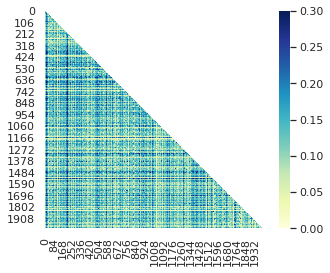

In [24]:
#Not running this as this is causing the runtime to crash due to RAM not being sufficient
corr = getCosineSimilarityMatrix(reducedData)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,  cmap="YlGnBu")
    plt.show()

Question 6) (15 points) Write a function that takes a cosine similarity matrix as input and
returns a list with the top n document paris and their similarity. Note that you should only keep
the document pairs that are unique and remove the comparisons of the document to itself. Print
the top 50 similar document pairs. Compare the assigned class for each document and answer:
Do all similar documents belong to the same class? Why or why not?

In [25]:
def findSimilarity(cosineMatrix, n):
   for i in range(len(cosineMatrix)):
      cosineMatrix[i][i] = 0
   x, y = np.unravel_index(cosineMatrix.flatten().argsort()[-2*n:], cosineMatrix.shape)
   x = np.flip(x)
   y = np.flip(y)
   result = []
   for i in range(0, len(x), 2):
      x1 = x[i]
      y1 = y[i]
      if x1 != y1:
         result.append((x1, y1, cosineMatrix[x1][y1]))
   return result

result = findSimilarity(corr,50)
for x in result:
  print(data[x[0]],"\n",target[x[0]])
  print(data[x[1]],"\n",target[x[1]])
  print("---------------------------")

Starts really well, nice intro and build up for the main characters but after about 5 minutes, the charm is lost.<br /><br />The character is in the same mould as the main protagonist from American Pie and Loser without the supporting cast or innovative storyline that made the Pie movies more of a commercial success.<br /><br />Let's be honest - Heder's acting was pretty poor. Keaton, Daniels and Faris did their best but had no substantial plot or script to get their teeth into The movie just plods on without any pace or clear logical storyline justifying its length.<br /><br />The ending is about as predictable as they come - so predictable I've ticked the spoilers box for this one line.<br /><br />My advice: avoid at all costs unless you really really have nothing else to do/listen to or watch and even then you'll feel the producers just cheated you out of an hour and a half of your life. 
 0
Ghost Town starts as Kate Barrett (Catherine Hickland) drives along an isolated desert road,

All the Similar documents belong to the same class. This is because, the words used in negative class are similar to each other same as with the positive class

Question 7) (20 points) Using Spacy’s part of speech tagger, process all sentences (hint: don’t
forget to split the reviews) and count how many NOUN and VERB tags are found in all the
movies review (TRAINING folder) separating them by label. In other words, how many NOUN
and VERB tags are found in positive reviews, and how many NOUN and VERB tags are found
in negative reviews. Answer the following question: When comparing both, do you see any
differences? Why do you think about the differences? Or lack of them.

In [26]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [36]:
#reducing the size of data because running this with the total data is taking a long time(I've waited for almost an hour)
negativeTarget = target[:int(len(target)/2)]
positiveTarget = target[int(len(target)/2):]
negativeData = data[:int(len(data)/2)]
positiveData = data[int(len(data)/2):]
negativeTarget = negativeTarget[:int(len(negativeTarget)/100)]
positiveTarget = positiveTarget[:int(len(positiveTarget)/100)]
negativeData = negativeData[:int(len(negativeData)/100)]
positiveData = positiveData[:int(len(positiveData)/100)]
print(len(negativeData))
negativeNouns = 0
negativeVerbs = 0
positiveNouns = 0
positiveVerbs = 0
puncts = []
punctsCount = []
for x in negativeData:
  doc = nlp(str(x))

  for sent in doc.sents:
      text =str(sent)
      doc1 = nlp(text)

      for token in doc1:
        if token.pos_=='NOUN':
          negativeNouns+=1
        elif token.pos_ == 'VERB':
          negativeVerbs+=1
        elif token.pos_ == 'PUNCT':
          if not np.isin(token.text,puncts):
            puncts.append(token.text)
            punctsCount.append(1)
          else:
            index = puncts.index(token.text)
            punctsCount[index]+=1

for x in positiveData:
  doc2 = nlp(str(x))

  for sent in doc2.sents:
      text =str(sent)
      doc3 = nlp(text)

      for token in doc3:
        if token.pos_=='NOUN':
          positiveNouns+=1
        elif token.pos_ == 'VERB':
          positiveVerbs+=1
        elif token.pos_== 'PUNCT':
          if not np.isin(token.text,puncts):
            puncts.append(token.text)
            punctsCount.append(1)
          else:
            index = puncts.index(token.text)
            punctsCount[index]+=1

print("Puncts : ",puncts)
print("Puncts Count : ",punctsCount)
print("NegativeNouns : ",str(negativeNouns))
print("NegativeVerbs : ",str(negativeVerbs))
print("PositiveNouns : ",str(positiveNouns))
print("Positive Verbs : ",str(positiveVerbs))


125
Puncts :  ['.', ',', '/>Not', '/>Bad', '?', '/>Also', '...', '/>Finally', '"', '/>All', '-', '/>The', '/>I', '/>From', '(', ')', '/>Sexual', "'", '!', ';', '/>Before', '/>7/08', ':', '\x96', '[', ']', '/>Shame', '/><br', '/>Technically', '/>LIBERAL', '.........', '/>Hey', '/>Heeey', '..', '/>Pretty', 'Higginson(Slaughterhouse)and', '/>Well', '....', '/>My', '/>There', '/>Who', '--', 'situations.<br', '/>Hepburn', '/>And', '/>Ben', 'ridiculous.<br', '/>To', '/>A', '.that', '/>With', '/>Perhaps', '/>Now', 'aside.<br', '/>This', '/>Where', '/>In', '/>It', '/>Of', '/>Some', '*', '/>Instead', '/>Anyway', '/>What', 'successful"(as', 'again.<br', '/>Steer', '/>Martial', '/>Mind', '/>Elsewhere', '0', '/>***Possible', '/>Yes', '/>But', '/>On', '/', '/>One', 'audience.<br', '/>At', '/>Basic', '/>Boy', '/>a', '/>Just', '/>Another', ':}', '/>There`s', '/>Director', '/>Jon', '/>Then', '/>Definitely', 'characters.<br', '/>Was', "/>Can't", 'funny.<br', '/>We', '/>Rob', '/>See', '/>Totally', '/>Ab

There are not much differences between the two sets. Whatever difference is there is miniscule compared to the amount of data. We can see that the number of Nouns and Verbs remains fairly similar in large data sets

Question 8) (20 points) Using the results from the PoS process in question 7, count how many
different PUNCT tags are found and their respective counts from the full dataset provided (both
negative and positives together). Using regex, write a set of regular expressions that generate
the same counts from the dataset without using NLTK or Spacy, just regex. Can you get the
same counts? If not, why do you think this is?

In [37]:
print("Puncts : ",len(puncts))
print("Puncts : ",puncts)
print("Puncts Count : ",punctsCount)

Puncts :  273
Puncts :  ['.', ',', '/>Not', '/>Bad', '?', '/>Also', '...', '/>Finally', '"', '/>All', '-', '/>The', '/>I', '/>From', '(', ')', '/>Sexual', "'", '!', ';', '/>Before', '/>7/08', ':', '\x96', '[', ']', '/>Shame', '/><br', '/>Technically', '/>LIBERAL', '.........', '/>Hey', '/>Heeey', '..', '/>Pretty', 'Higginson(Slaughterhouse)and', '/>Well', '....', '/>My', '/>There', '/>Who', '--', 'situations.<br', '/>Hepburn', '/>And', '/>Ben', 'ridiculous.<br', '/>To', '/>A', '.that', '/>With', '/>Perhaps', '/>Now', 'aside.<br', '/>This', '/>Where', '/>In', '/>It', '/>Of', '/>Some', '*', '/>Instead', '/>Anyway', '/>What', 'successful"(as', 'again.<br', '/>Steer', '/>Martial', '/>Mind', '/>Elsewhere', '0', '/>***Possible', '/>Yes', '/>But', '/>On', '/', '/>One', 'audience.<br', '/>At', '/>Basic', '/>Boy', '/>a', '/>Just', '/>Another', ':}', '/>There`s', '/>Director', '/>Jon', '/>Then', '/>Definitely', 'characters.<br', '/>Was', "/>Can't", 'funny.<br', '/>We', '/>Rob', '/>See', '/>Total

We will not be able to get the same counts from the dataset as we can see that spacy is giving out punctuations like />Not , [ etc and we cannot program a regex which can find all the patterns